# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Data for National and State for three years from the Bureau of Labor Statistics.
N2021_df = pd.read_excel('/Users/nicolette/Desktop/LaunchCode/Project Arts/oesm21nat/national_M2021_dl.xlsx', index_col=0)
S2021_df = pd.read_excel('/Users/nicolette/Desktop/LaunchCode/Project Arts/oesm21st/state_M2021_dl.xlsx', index_col=0)
N2020_df = pd.read_excel('/Users/nicolette/Desktop/LaunchCode/Project Arts/oesm20nat/national_M2020_dl.xlsx', index_col=0)
S2020_df = pd.read_excel('/Users/nicolette/Desktop/LaunchCode/Project Arts/oesm20st/state_M2020_dl.xlsx', index_col=0)
N2019_df = pd.read_excel('/Users/nicolette/Desktop/LaunchCode/Project Arts/oesm19nat/national_M2019_dl.xlsx', index_col=0)
S2019_df = pd.read_excel('/Users/nicolette/Desktop/LaunchCode/Project Arts/oesm19st/state_M2019_dl.xlsx', index_col=0)

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [91]:
N2021_df.head(1)

,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
AREA,,,,,,,,,,,,,,,,,,,,,
99,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,...,22,32.98,49.43,23980,29950,45760,68590,102810,NaN,NaN


In [92]:
S2021_df.head(1)

,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
AREA,,,,,,,,,,,,,,,,,,,,,
1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,...,17.91,28.68,39.79,18630,24720,37250,59660,82760,NaN,NaN


In [93]:
print('Shape: N2021',N2021_df.shape,'S2021',S2021_df.shape,'N2020',N2020_df.shape,'S2020',S2020_df.shape,'N2019',N2019_df.shape,'S2019',S2019_df.shape)

Shape: N2021 (1403, 31) S2021 (37580, 31) N2020 (1329, 30) S2020 (36085, 30) N2019 (1329, 29) S2019 (36382, 29)


In [150]:
# Will need to research why some numerical columns are objects 
print(N2021_df.dtypes)
print(S2021_df.dtypes)

OCC_CODE      object
OCC_TITLE     object
O_GROUP       object
TOT_EMP        int64
A_MEAN        object
H_MEAN        object
Year           int64
AREA_TITLE    object
dtype: object
OCC_CODE      object
OCC_TITLE     object
O_GROUP       object
TOT_EMP       object
A_MEAN        object
H_MEAN        object
Year           int64
AREA_TITLE    object
dtype: object


In [149]:
# add a column to each set signifying the year 
N2021_df["Year"] = int(2021)
S2021_df["Year"] = int(2021)
N2020_df["Year"] = int(2020)
S2020_df["Year"] = int(2020)
N2019_df["Year"] = int(2019)
S2019_df["Year"] = int(2019)

In [95]:
#Change the names of the columns for 2019 dataset to match capitilzation of other sets.
N2019_df.rename(columns={'occ_code': 'OCC_CODE', 'occ_title': 'OCC_TITLE','o_group' : 'O_GROUP','tot_emp' : 'TOT_EMP','a_mean':'A_MEAN','h_mean':'H_MEAN','area_title':'AREA_TITLE'}, inplace=True)
S2019_df.rename(columns={'occ_code': 'OCC_CODE', 'occ_title': 'OCC_TITLE','o_group' : 'O_GROUP','tot_emp' : 'TOT_EMP','a_mean':'A_MEAN','h_mean':'H_MEAN','area_title':'AREA_TITLE'}, inplace=True)

In [96]:
#Grab only the columns needed for each table
N2021_df = N2021_df[['OCC_CODE','OCC_TITLE','O_GROUP','TOT_EMP','A_MEAN', 'H_MEAN', 'Year', 'AREA_TITLE']]
S2021_df = S2021_df[['OCC_CODE','OCC_TITLE','O_GROUP','TOT_EMP','A_MEAN', 'H_MEAN', 'Year', 'AREA_TITLE']]
N2020_df = N2020_df[['OCC_CODE','OCC_TITLE','O_GROUP','TOT_EMP','A_MEAN', 'H_MEAN', 'Year', 'AREA_TITLE']]
S2020_df = S2020_df[['OCC_CODE','OCC_TITLE','O_GROUP','TOT_EMP','A_MEAN', 'H_MEAN', 'Year', 'AREA_TITLE']]
N2019_df = N2019_df[['OCC_CODE','OCC_TITLE','O_GROUP','TOT_EMP','A_MEAN', 'H_MEAN', 'Year', 'AREA_TITLE']]
S2019_df = S2019_df[['OCC_CODE','OCC_TITLE','O_GROUP','TOT_EMP','A_MEAN', 'H_MEAN', 'Year', 'AREA_TITLE']]


In [97]:
#Combine into 2 data sets, national data and state data.
national_df = pd.concat([N2021_df, N2020_df,N2019_df])
state_df = pd.concat ([S2021_df, S2020_df,S2019_df])

In [130]:
#Keep only rows to do with Art as an occupation according to the occupational code.
national_df = national_df.query("OCC_CODE in ('27-0000','27-1000','27-1010','27-1011','27-1012','27-1013','27-1014','27-1019','27-1020','27-1021','27-1022','27-1023','27-1024','27-1025','27-1026','27-1027','27-1029','27-2000','27-2010','27-2011','27-2012','27-2020','27-2022','27-2023','27-2030','27-2031','27-2032','27-2040','27-2041','27-2042','27-2090','27-2091','27-2099','27-3000','27-3010','27-3011','27-3020','27-3023','27-3030','27-3031','27-3040','27-3041','27-3042','27-3043','27-3090','27-3091','27-3092','27-3099','27-4000','27-4010','27-4011','27-4012','27-4014','27-4015','27-4020','27-4021','27-4030','27-4031','27-4032','27-4090','27-4099')")
state_df = state_df.query("OCC_CODE in ('27-0000','27-1000','27-1010','27-1011','27-1012','27-1013','27-1014','27-1019','27-1020','27-1021','27-1022','27-1023','27-1024','27-1025','27-1026','27-1027','27-1029','27-2000','27-2010','27-2011','27-2012','27-2020','27-2022','27-2023','27-2030','27-2031','27-2032','27-2040','27-2041','27-2042','27-2090','27-2091','27-2099','27-3000','27-3010','27-3011','27-3020','27-3023','27-3030','27-3031','27-3040','27-3041','27-3042','27-3043','27-3090','27-3091','27-3092','27-3099','27-4000','27-4010','27-4011','27-4012','27-4014','27-4015','27-4020','27-4021','27-4030','27-4031','27-4032','27-4090','27-4099')")

In [131]:
#Filter out all other 'areas' except the state of Missouri
missouri_df= state_df.query("AREA_TITLE == 'Missouri'")

## Questions: columns needed to answer questions:
 Is there a significant decrease in artists from 2019 to 2021? **OOC_TITLE/OOC_CODE and TOT_EMP** 
 
 Are there certain artist groups (performing, visual, musician, etc) that were hit harder than others? **add A_MEAN and H_MEAN**
 
For those who stayed in the arts, is there a significant difference in earnings? **Trends over time**

How does Missouri compare to National averages? **Same columns for national avg vs state avg**

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

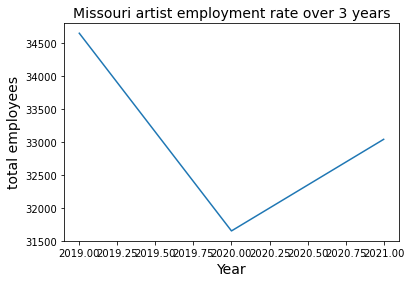

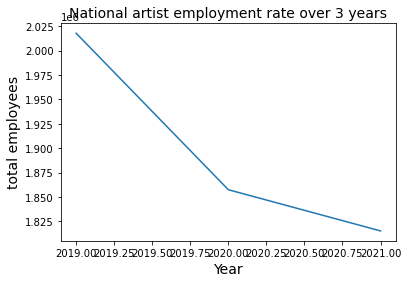

In [142]:
#At a glance view of employment rate of artists in Missouri and nationally 
occ_missouri_df = missouri_df.query("OCC_CODE in ('27-0000')")
occ_national_df = national_df.query("OCC_CODE in ('27-0000')")

plt.plot(occ_missouri_df['Year'], occ_missouri_df['TOT_EMP'])
plt.title('Missouri artist employment rate over 3 years', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('total employees', fontsize=14)
plt.show()

plt.plot(occ_national_df['Year'], occ_national_df['TOT_EMP'])
plt.title('National artist employment rate over 3 years', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('total employees', fontsize=14)
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
**Inconsistencies with capitalizations and naming. I was pleasantly surprised that they inlcuded a column to help break down the heirarcal structure of the OCC columns (O_GROUP).**
2. Do you have any concerns about your dataset? 
**This dataset does not include self employeed artists which make up a large portion of artists- I'm afraid this will skew the data.** 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
**There are ** and * for some of the values in the TOT_EMP, A_MEAN and H_MEAN columns that will need to be dealt with in order to convert those values to integers or floats for the purpose of aggrigations and graphs.** 

In [157]:
#1st file crashed due to file size, this is to check file size before saving.
!ls -lh

total 264
-rw-r--r--  1 nicolette  staff    64K Jan 31 13:01 checkpoint-two-Copy1.ipynb
-rw-rw-r--@ 1 nicolette  staff    67K Jan 31 13:58 checkpoint-two.ipynb
